In [2]:
import pandas as pd
from pandas.io.json import json_normalize
import requests
import json
import os
from fuzzywuzzy import process, fuzz

### Kitchener data

In [3]:
import requests
response2010 = requests.get("https://opendata.arcgis.com/datasets/a47ef9f046d442808c306dfd59ec2f7c_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1998 = requests.get("https://opendata.arcgis.com/datasets/d056d3e23558481bbd99376e1718d0a3_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1997 = requests.get("https://opendata.arcgis.com/datasets/fcfa7d6ada794969bbed357e4bd85294_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1996 = requests.get("https://opendata.arcgis.com/datasets/76f77c2b2d864689bc0fc9adfbf690f7_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1995 = requests.get("https://opendata.arcgis.com/datasets/f362b8c4652d49d6bbb7a59478132caf_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1992 = requests.get("https://opendata.arcgis.com/datasets/a59f7b37fcc540438a63b36035ca0068_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2003 = requests.get("https://opendata.arcgis.com/datasets/02223f9066294cadb1737234d5ccc5ab_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2004 = requests.get("https://opendata.arcgis.com/datasets/78ab0cb401c349fa95c16b83d7e5d194_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2005 = requests.get("https://opendata.arcgis.com/datasets/bde5696c88654b6d84ae5ad7f6c910b6_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1993 = requests.get("https://opendata.arcgis.com/datasets/5f3c2930f4e4459ea66c6765a1b3bd88_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2000 = requests.get("https://opendata.arcgis.com/datasets/f218c27832da4fa083eb7b7c7dc1afec_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2002 = requests.get("https://opendata.arcgis.com/datasets/39f6b9d302354b2bbe044220c10621fd_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2007 = requests.get("https://opendata.arcgis.com/datasets/ad3e9afade7a4542839c562adfaff15e_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2008 = requests.get("https://opendata.arcgis.com/datasets/ebdd6808d748465689e343427cd8bf2f_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2006 = requests.get("https://opendata.arcgis.com/datasets/6b85448141bd4186850540e49189ce9d_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1994 = requests.get("https://opendata.arcgis.com/datasets/8c7ecc63062f470ab0793159cd7fbd8b_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1999 = requests.get("https://opendata.arcgis.com/datasets/a89b670d719a4d77a9190db4c456be3e_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2001 = requests.get("https://opendata.arcgis.com/datasets/a5f9ee5558e94e8fb6db498c1a318863_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2011 = requests.get("https://opendata.arcgis.com/datasets/d20e0fe797ac49f2b5033f81f754763d_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2012 = requests.get("https://opendata.arcgis.com/datasets/19105a10a66043a0802094650964935d_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2013 = requests.get("https://opendata.arcgis.com/datasets/66e434b25b234814831bd46baf9b7619_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2014 = requests.get("https://opendata.arcgis.com/datasets/dcd52c58025d4e6dbd6c188362f4322d_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2015 = requests.get("https://opendata.arcgis.com/datasets/c4327fc9ba164100a806bc9244b73908_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2016 = requests.get("https://opendata.arcgis.com/datasets/31937f8462c347188bb06796f73442df_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2009 = requests.get("https://opendata.arcgis.com/datasets/f2ab29afe873498f824492d114f80dc7_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
responses = [response1993, response1994, response1995, response1996, response1997, response1998, response1999, response2000, response2001, response2002, response2003, response2004, response2005, response2006, response2007, 
             response2008, response2009, response2010, response2011, response2012, response2013, response2014, response2015, response2016]

In [4]:
colnames = ['Decision', 'OBJECTID', 'Request_Number', 'Request_Type', 'Source', 'Summary_of_Request']
all_df = pd.DataFrame(columns=colnames)
# in 2014, some of the columns had an extra ':' afterward, so fix the column headings here
for response in responses:
    data = response.json()
    df = json_normalize(data["features"])
    df.columns = colnames
    all_df = all_df.append(df, sort=True)
kw_df = all_df

### Toronto data

In [5]:
# just keep these columns
tor_colnames = ['Request_Number', 'Request_Type', 'Source', 'Summary', 'Disposition', 'Name']
tor_df = pd.DataFrame(columns=tor_colnames)
for file in os.listdir("Toronto_data/requests"):
    if file.endswith(".xlsx") or file.endswith(".xls"):
        #print(file)
        tor_data = pd.read_excel("Toronto_data/requests/"+file, header=0)
        #print(tor_df.columns)
        tor_df = pd.concat([tor_df,tor_data], axis=0, ignore_index=True, sort=True, join_axes=[tor_df.columns])
        #print(tor_df.head())
# Talk about use of join_axes here. Had thought of going the fuzzywuzzy route, but the most important column, the decision, 
# was named either 'Disposition' or 'Name' which would not have been caught by the algorithm.

In [6]:
print(tor_df.columns)
print(tor_df.head())
print(tor_df.isnull().sum())

Index(['Request_Number', 'Request_Type', 'Source', 'Summary', 'Disposition',
       'Name'],
      dtype='object')
  Request_Number     Request_Type               Source  \
0  AG-2015-00001  General Records               Public   
1  AG-2015-00001  General Records               Public   
2  AG-2015-00002  General Records               Public   
3  AG-2015-00003  General Records  Academic/Researcher   
4  AG-2015-00004  General Records             Business   

                                             Summary Disposition  \
0  All e-mails to and from Mario Crognale, Direct...         NaN   
1  All e-mails to and from Mario Crognale, Direct...         NaN   
2  A copy of building department file # 400812-19...         NaN   
3  For the period 2004-01-01 to 2014-12-18: -aver...         NaN   
4  Copies of all application submitted (including...         NaN   

                                  Name  
0  Disclosed in Part: Partially Exempt  
1  Disclosed in Part: Partially Exempt  
2  D

In [7]:
# Now let's fill all of the empty 'Disposition' spots with the Name as these columns are either/or
tor_df['Disposition'] = tor_df['Disposition'].fillna(tor_df['Name'])
tor_df.isnull().sum()

Request_Number     274
Request_Type       585
Source             585
Summary              0
Disposition         25
Name              6226
dtype: int64

In [8]:
tor_df = tor_df.drop(['Name'], axis=1)
# Now rename the 'Disposition' and 'Summary' columns so that they match what we have from KW
tor_df.columns = ['Request_Number', 'Request_Type', 'Source', 'Summary_of_Request', 'Decision']
print(tor_df.columns)

Index(['Request_Number', 'Request_Type', 'Source', 'Summary_of_Request',
       'Decision'],
      dtype='object')


In [9]:
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10699 entries, 0 to 10698
Data columns (total 5 columns):
Request_Number        10425 non-null object
Request_Type          10114 non-null object
Source                10114 non-null object
Summary_of_Request    10699 non-null object
Decision              10674 non-null object
dtypes: object(5)
memory usage: 418.0+ KB


In [121]:
# Now let's see if we can combine with KW data
all_df = pd.concat([kw_df, tor_df], axis=0, ignore_index=True, sort=True, join_axes=[tor_df.columns])

In [122]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11521 entries, 0 to 11520
Data columns (total 5 columns):
Request_Number        11247 non-null object
Request_Type          10936 non-null object
Source                10936 non-null object
Summary_of_Request    11521 non-null object
Decision              11496 non-null object
dtypes: object(5)
memory usage: 450.1+ KB


In [123]:
print(all_df['Decision'].value_counts())
print(len(all_df['Decision'].unique()))

Disclosed in Part: Partially Exempt                6207
All Disclosed                                      2607
No Responsive Records Exist                         547
No Records Exist                                    395
Disclosed in Part: No Records Exist                 329
All disclosed                                       238
Partly exempted                                     197
Nothing Disclosed (exemption)                       181
Transferred Out in Full                             165
Abandoned/Withdrawn by Applicant                    139
Withdrawn                                           116
Nothing Disclosed (excluded)                         61
No records exist                                     54
Information disclosed in part                        50
Partly non-existent                                  32
Nothing disclosed                                    28
No record exists                                     21
Nothing Disclosed                               

### Combine these fields using fuzzywuzzy

In [124]:
all_df['Decision'] = all_df['Decision'].fillna("")

In [125]:
all_df_clean = all_df.copy()

In [126]:
for row in all_df['Decision'].unique():
    for row2 in all_df['Decision'].unique():
        matching_result = fuzz.ratio(row, row2) # could be ratio, partial_ratio, token_set_ratio, token_sort_ratio 
        if matching_result > 80:
            #print(row, row2)
            #print(matching_results)
            #Combine if match found
            all_df_clean['Decision'][all_df_clean['Decision'] == row2] = row

In [127]:
print(all_df_clean['Decision'].value_counts())
print(len(all_df_clean['Decision'].unique()))

 Disclosed in Part: Partially Exempt               6209
All Disclosed                                      2847
No Responsive Records Exist                         558
No Records Exist                                    470
Disclosed in Part: No Records Exist                 329
Nothing Disclosed (excluded)                        242
Partly exempted                                     197
Transferred Out in Full                             165
Abandoned/Withdrawn by Applicant                    139
Withdrawn                                           116
Information disclosed in part                        50
Nothing Disclosed                                    49
Partly non-existent                                  32
No information disclosed                             30
                                                     25
Abandoned After Fee Estimate                         16
Forwarded out                                        15
Abandoned                                       

### Compare with other fuzzywuzzy algorithms

In [128]:
all_df_pr = all_df.copy()

In [129]:
for row in all_df['Decision'].unique():
    for row2 in all_df['Decision'].unique():
        matching_result = fuzz.partial_ratio(row, row2) # could be ratio, partial_ratio, token_set_ratio, token_sort_ratio 
        if matching_result > 80:
            #print(row, row2)
            #print(matching_results)
            #Combine if match found
            all_df_pr['Decision'][all_df_pr['Decision'] == row2] = row

In [130]:
print(all_df_pr['Decision'].value_counts())
print(len(all_df_pr['Decision'].unique()))

 Disclosed in Part: Partially Exempt    6208
All Disclosed                           2847
No Records Exist                        1358
Nothing Disclosed                        291
Request withdrawn                        256
Disclosed in part/ partly exempt         198
Transferred Out in Full                  168
No information disclosed                  80
Non-existent                              35
Abandoned/Withdrawn by Applicant          29
                                          25
Forwarded out                             15
Correction made in part                    3
Correction refused                         3
Not Applicable                             2
Correction granted                         1
Statement of disagreement filed            1
Deemed Refusal                             1
Name: Decision, dtype: int64
18


### 'Partial_ratio' seems to be closer to what we want, i.e. the 'abandoned/withdrawn' cases have been nicely combined

In [131]:
all_df_tsr = all_df.copy()

In [132]:
for row in all_df['Decision'].unique():
    for row2 in all_df['Decision'].unique():
        matching_result = fuzz.token_sort_ratio(row, row2) # could be ratio, partial_ratio, token_set_ratio, token_sort_ratio 
        if matching_result > 80:
            #print(row, row2)
            #print(matching_results)
            #Combine if match found
            all_df_tsr['Decision'][all_df_tsr['Decision'] == row2] = row

In [133]:
print(all_df_tsr['Decision'].value_counts())
print(len(all_df_tsr['Decision'].unique()))

 Disclosed in Part: Partially Exempt               6209
All Disclosed                                      2847
No Responsive Records Exist                         558
No Records Exist                                    470
Disclosed in Part: No Records Exist                 329
Partly exempted                                     197
Nothing Disclosed (exemption)                       181
Transferred Out in Full                             165
Abandoned/Withdrawn by Applicant                    139
Withdrawn                                           116
No information disclosed                             80
Nothing Disclosed (excluded)                         61
Nothing Disclosed                                    49
Partly non-existent                                  32
                                                     25
Abandoned After Fee Estimate                         16
Forwarded out                                        15
Abandoned                                       

### The same as 'partial_ratio'...

In [134]:
all_df_tokset = all_df.copy()

In [135]:
for row in all_df['Decision'].unique():
    for row2 in all_df['Decision'].unique():
        matching_result = fuzz.token_set_ratio(row, row2) # could be ratio, partial_ratio, token_set_ratio, token_sort_ratio 
        if matching_result > 80:
            #print(row, row2)
            #print(matching_results)
            #Combine if match found
            all_df_tokset['Decision'][all_df_tokset['Decision'] == row2] = row

In [136]:
print(all_df_tokset['Decision'].value_counts())
print(len(all_df_tokset['Decision'].unique()))

### We've trimmed a few more categories, but the 'All disclosed' branch has been lumped in with 'Nothing Disclosed (excluded)' which obviously won't do

No Records Exist                    10785
Request withdrawn                     256
Partly exempted                       197
Transferred Out in Full               168
Non-existent                           35
Abandoned/Withdrawn by Applicant       29
                                       25
Forwarded out                          15
Correction made in part                 3
Correction refused                      3
Not Applicable                          2
Deemed Refusal                          1
Correction granted                      1
Statement of disagreement filed         1
Name: Decision, dtype: int64
14


### We've trimmed a few more categories, but the 'All disclosed' branch has been lumped in with 'Nothing Disclosed (excluded)' which obviously won't do. Let's use 'partial_ratio' going forward.

### Still need to combine some cases manually

In [137]:
all_df_pr['Decision'].loc[all_df_pr['Decision'] == "Non-existent"] = "No Records Exist"
all_df_pr['Decision'].loc[all_df_pr['Decision'] == "No information disclosed "] = "Nothing Disclosed"
all_df_pr['Decision'].loc[all_df_pr['Decision'] == "Disclosed in part/ partly exempt"] = " Disclosed in Part: Partially Exempt"

 Disclosed in Part: Partially Exempt    6208
All Disclosed                           2847
No Records Exist                        1358
Nothing Disclosed                        291
Request withdrawn                        256
Disclosed in part/ partly exempt         198
Transferred Out in Full                  168
No information disclosed                  80
Non-existent                              35
Abandoned/Withdrawn by Applicant          29
                                          25
Forwarded out                             15
Correction made in part                    3
Correction refused                         3
Not Applicable                             2
Correction granted                         1
Statement of disagreement filed            1
Deemed Refusal                             1
Name: Decision, dtype: int64


In [138]:
all_df_pr['Decision'].value_counts()

 Disclosed in Part: Partially Exempt    6406
All Disclosed                           2847
No Records Exist                        1393
Nothing Disclosed                        371
Request withdrawn                        256
Transferred Out in Full                  168
Abandoned/Withdrawn by Applicant          29
                                          25
Forwarded out                             15
Correction made in part                    3
Correction refused                         3
Not Applicable                             2
Deemed Refusal                             1
Correction granted                         1
Statement of disagreement filed            1
Name: Decision, dtype: int64

### Restrict to the top 6 decisions

In [139]:
all_df_top6 = all_df_pr.groupby('Decision').filter(lambda x: len(x) > 100)
print(all_df_top6['Decision'].value_counts())
categories = all_df_top6['Decision'].value_counts().index.tolist()

 Disclosed in Part: Partially Exempt    6406
All Disclosed                           2847
No Records Exist                        1393
Nothing Disclosed                        371
Request withdrawn                        256
Transferred Out in Full                  168
Name: Decision, dtype: int64


In [140]:
# encode the target variable as an integer
all_df_top6['category_id'] = all_df_top6['Decision'].factorize()[0]

/Users/sjones/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [157]:
category_id_df = all_df_top6[['Decision', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df.head()

,Decision,category_id
0,All Disclosed,0
1,No Records Exist,1
2,Disclosed in Part: Partially Exempt,2
26,Request withdrawn,3
152,Nothing Disclosed,4


In [142]:
### Don't need this right now
#category_to_id = dict(category_id_df.values)
#print(category_to_id)
#id_to_category = dict(category_id_df[['category_id', 'Decision']].values)
#print(id_to_category)

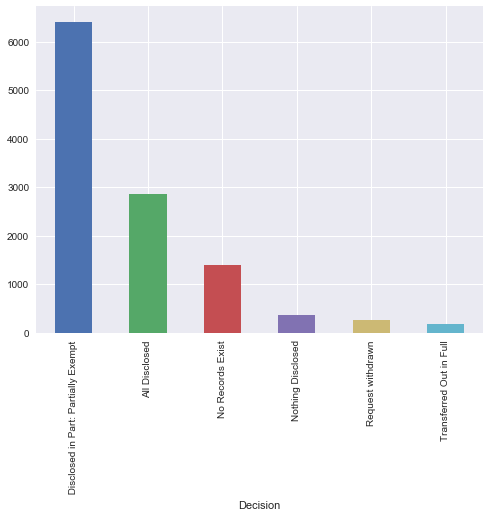

In [143]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
all_df_top6.groupby('Decision').Summary_of_Request.count().plot.bar(ylim=0)
plt.show()

In [144]:
# Here is where we might put in upsampling

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', 
                       encoding='latin-1', ngram_range=(1,2), stop_words='english')

features = tfidf.fit_transform(all_df_top6.Summary_of_Request).toarray()
labels = all_df_top6.category_id
features.shape

/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(11441, 6705)

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

X_train, X_test, y_train, y_test = train_test_split(all_df_top6['Summary_of_Request'], all_df_top6['Decision'], test_size=0.33, random_state=42, shuffle=True)

In [147]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3,
                          random_state=0), #, class_weight='balanced'),
    LinearSVC(), #class_weight='balanced'),
    MultinomialNB(),
    LogisticRegression(random_state=0)#, class_weight='balanced'),
]
CV=5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries=[]
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels,
                                scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/Users/sjones/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


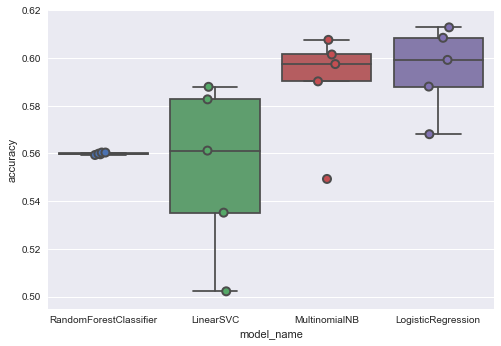

model_name
LinearSVC                 0.553828
LogisticRegression        0.595331
MultinomialNB             0.589216
RandomForestClassifier    0.559916
Name: accuracy, dtype: float64


In [148]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
             size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
print(cv_df.groupby('model_name').accuracy.mean())

In [149]:
X_train.head()

10949    A copy of all building records for {a specifie...
1956     Copies of documents from Festival Management C...
9595     A copy of the fire report for {a specified add...
9551     A copy of the fire report for {a specified add...
5116     A copy of the fire report for {a specified add...
Name: Summary_of_Request, dtype: object

In [150]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
import spacy
from spacy.lang.en import English
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS
import string
parser = English()
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS)+ list(STOPWORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]

def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [151]:
y_train_dums = pd.get_dummies(y_train)
y_test_dums = pd.get_dummies(y_test)

In [152]:
from sklearn.metrics import accuracy_score

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', OneVsRestClassifier(MultinomialNB())),
            ])

for decision in categories:
    print(decision)
    NB_pipeline.fit(X_train, y_train_dums[decision])
    prediction = NB_pipeline.predict(X_test)    
    print('Test accuracy is {}'.format(accuracy_score(y_test_dums[decision], prediction)))

 Disclosed in Part: Partially Exempt


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.6986228813559322
All Disclosed


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.7523834745762712
No Records Exist


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.887447033898305
Nothing Disclosed


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.9647775423728814
Request withdrawn


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.9753707627118644
Transferred Out in Full


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.9856991525423728


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [153]:
LSVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])

for decision in categories:
    print(decision)
    LSVC_pipeline.fit(X_train, y_train_dums[decision])
    prediction = LSVC_pipeline.predict(X_test)    
    print('Test accuracy is {}'.format(accuracy_score(y_test_dums[decision], prediction)))

 Disclosed in Part: Partially Exempt


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.6880296610169492
All Disclosed


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.7521186440677966
No Records Exist


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.881885593220339
Nothing Disclosed


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.9671610169491526
Request withdrawn


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.9745762711864406
Transferred Out in Full


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.9872881355932204


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [154]:
LR_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', OneVsRestClassifier(LogisticRegression(random_state=0))),
            ])

for decision in categories:
    print(decision)
    LR_pipeline.fit(X_train, y_train_dums[decision])
    prediction = LR_pipeline.predict(X_test)    
    print('Test accuracy is {}'.format(accuracy_score(y_test_dums[decision], prediction)))

 Disclosed in Part: Partially Exempt


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.708156779661017
All Disclosed


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.7635063559322034
No Records Exist


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.8895656779661016
Nothing Disclosed


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.9647775423728814
Request withdrawn


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.9753707627118644
Transferred Out in Full


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.986228813559322


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [155]:
RF_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_estimators=200, max_depth=3,
                          random_state=0))),
            ])

for decision in categories:
    print(decision)
    RF_pipeline.fit(X_train, y_train_dums[decision])
    prediction = RF_pipeline.predict(X_test)    
    print('Test accuracy is {}'.format(accuracy_score(y_test_dums[decision], prediction)))

 Disclosed in Part: Partially Exempt


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.5699152542372882
All Disclosed


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.7478813559322034
No Records Exist


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.8871822033898306
Nothing Disclosed


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.9647775423728814
Request withdrawn


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.9753707627118644
Transferred Out in Full


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.9856991525423728


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [177]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

knn_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', KNeighborsClassifier(n_neighbors=1)),
            ])

knn_pipeline.fit(X_train, y_train)

#plot_decision_regions(X_train.values, y_train.values, clf=knn)

knn_pipeline.score(X_test, y_test)

/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


0.5466101694915254

In [173]:
y_train.values

array([' Disclosed in Part: Partially Exempt', 'No Records Exist',
       ' Disclosed in Part: Partially Exempt', ...,
       ' Disclosed in Part: Partially Exempt', 'All Disclosed',
       ' Disclosed in Part: Partially Exempt'], dtype=object)